In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.rename(columns={"v1":"Result","v2":"Msg"},inplace=True)
df.head()

,Result,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Result"] = le.fit_transform(df["Result"])
df.head()

,Result,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

Result    0
Msg       0
dtype: int64

In [16]:
print(df.duplicated().sum())
df = df.drop_duplicates(keep = "first")
print(df.duplicated().sum())

403
0


# EDA

In [19]:
df.head()

,Result,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df["Result"].value_counts()

Result
0    4516
1     653
Name: count, dtype: int64

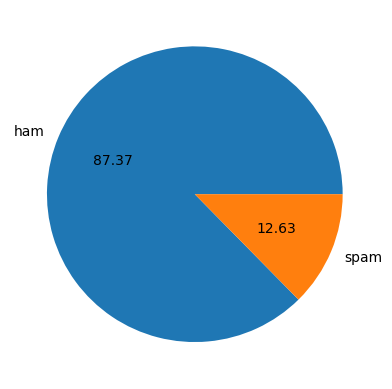

In [23]:
import matplotlib.pyplot as plt
plt.pie(df["Result"].value_counts(),labels = ["ham","spam"], autopct = "%0.2f")
plt.show()

In [25]:
import nltk
df["num_character"] = df["Msg"].apply(len)
df["num_words"] = df["Msg"].apply(lambda x:len(nltk.word_tokenize(x)))
df["num_sentence"] = df["Msg"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Result,Msg,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df["Result"]==0][["num_character","num_words","num_sentence"]].describe() #Ham

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df["Result"]==1][["num_character","num_words","num_sentence"]].describe() #Spam

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


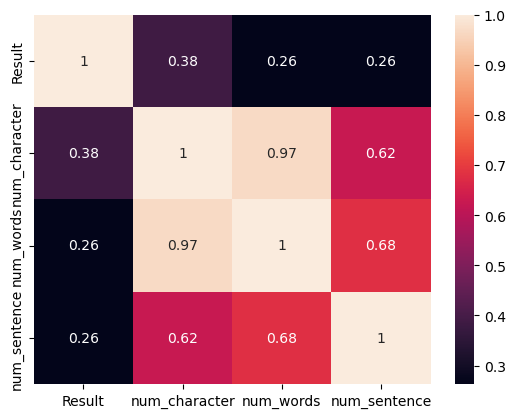

In [33]:
import seaborn as sns
df2 = df.drop(columns="Msg")
sns.heatmap(df2.corr(),annot = True)
plt.show()

# Data Preprocessing

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y
    y = []
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y
    y = []
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)     

In [38]:
df["transform"] = df["Msg"].apply(transform_text)
df.head()

,Result,Msg,num_character,num_words,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


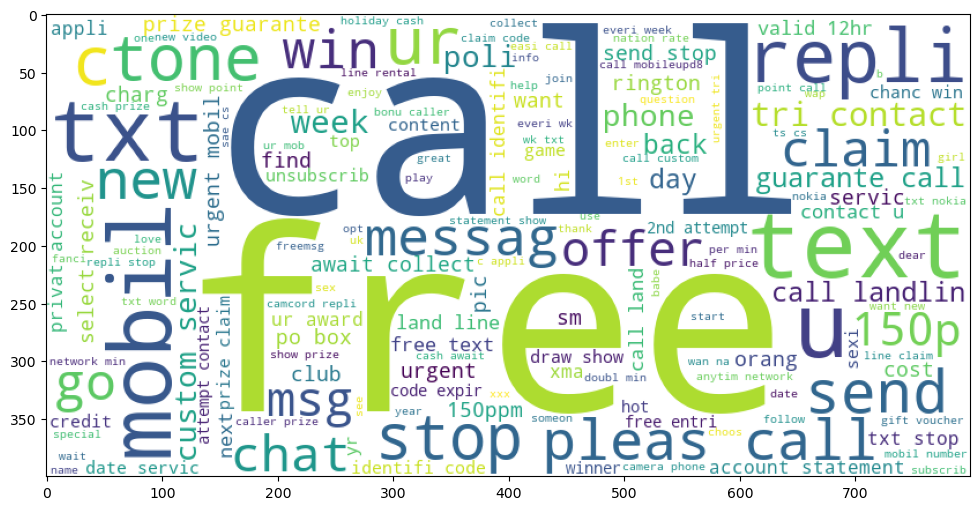

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width = 800,height = 400 ,min_font_size =10,background_color ="white")
spam_wc = wc.generate(df[df["Result"] == 1]["transform"].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

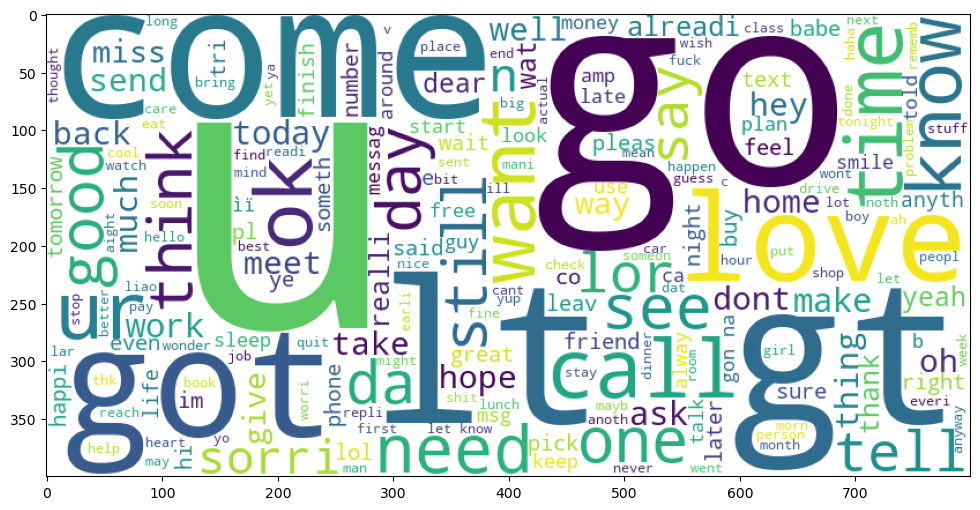

In [42]:
wc = WordCloud(width = 800,height = 400 ,min_font_size =10,background_color ="white")
ham_wc = wc.generate(df[df["Result"] == 0]["transform"].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [44]:
spam_count = []
for msg in df[df["Result"]==1]['transform'].tolist():
    for word in msg.split():
        spam_count.append(word)
len(spam_count )

9939

In [46]:
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_count).most_common(30))
df_spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [48]:
ham_count = []
for msg in df[df["Result"]==0]['transform'].tolist():
    for word in msg.split():
        ham_count.append(word)
len(ham_count )  

35404

In [50]:
df_ham = pd.DataFrame(Counter(ham_count).most_common(30))
df_ham.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


# Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features = 3000)
X = tf.fit_transform(df["transform"]).toarray()
X.shape

(5169, 3000)

In [55]:
Y = df["Result"].values

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 41)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

85.58994197292068
[[780 118]
 [ 31 105]]
47.08520179372198


In [63]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

97.00193423597679
[[897   1]
 [ 30 106]]
99.06542056074767


In [65]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)*100)

98.06576402321083
[[896   2]
 [ 18 118]]
98.33333333333333


In [67]:
# we choose tfidf -> mnb

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)*100
    
    return accuracy,precision

In [77]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(96.80851063829788, 94.78260869565217)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  96.80851063829788
Precision -  94.78260869565217
For  KN
Accuracy -  90.81237911025146
Precision -  100.0
For  NB
Accuracy -  97.00193423597679
Precision -  99.06542056074767
For  DT
Accuracy -  93.52030947775629
Precision -  84.84848484848484
For  LR
Accuracy -  94.97098646034816
Precision -  89.62264150943396
For  RF
Accuracy -  97.1953578336557
Precision -  100.0


C:\Users\naman\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  96.32495164410058
Precision -  90.1639344262295
For  BgC
Accuracy -  96.32495164410058
Precision -  87.12121212121212
For  ETC
Accuracy -  97.00193423597679
Precision -  94.87179487179486
For  GBDT
Accuracy -  95.74468085106383
Precision -  95.09803921568627
For  xgb
Accuracy -  97.58220502901354
Precision -  95.86776859504133


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,90.812379,100.000000
5,RF,97.195358,100.000000
2,NB,97.001934,99.065421
10,xgb,97.582205,95.867769
9,GBDT,95.744681,95.098039
8,ETC,97.001934,94.871795
0,SVC,96.808511,94.782609
6,AdaBoost,96.324952,90.163934
4,LR,94.970986,89.622642
7,BgC,96.324952,87.121212


In [83]:
# Voting Classifer
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [85]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9741379310344828


In [89]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))